# データ解析基礎講座　四日目　テーマ：回帰分析

## 散布図に回帰直線を重ねる

ある２つの変量の散布図を描いた時、そこに近似線を加えることはよくあります。この近似線は通常「最小二乗法」で求められたもので、この計算を統計学では「回帰分析」といいます。まず、例題のデータを読み込みます。

In [1]:
import pandas as pd
df1=pd.read_excel('データ解析講座四日目演習.xlsx',sheet_name='家計指標',index_col=0)
df1.head()

,県名,実収入,世帯主収入,消費支出,食料費割合,住居費割合,光熱・水道費割合,家具・家事用品費割合,被服及び履物費割合,保健医療費割合
コード,,,,,,,,,,
1,北 海 道,529.9,422.7,287.3,24.2,5.9,8.5,3.3,3.9,4.3
2,青 森 県,442.9,333.4,236.8,29.2,4.0,11.3,4.1,3.3,4.2
3,岩 手 県,522.9,403.5,289.0,24.6,5.2,8.7,3.7,3.8,5.1
4,宮 城 県,419.9,341.5,281.0,26.4,6.5,7.8,4.0,4.1,5.1
5,秋 田 県,459.0,343.4,255.2,25.6,5.4,9.6,3.7,3.1,5.4


次に、「実収入」と「消費支出」をそれぞれリストx,yに格納します。

In [2]:
x = df1['実収入'].values
y = df1['消費支出'].values

多項式の近似式は、np.polyfit()で求めます。この場合は直線なので多項式の次数は1です。ここでは、切片（定数項）をa, 傾きをbとします。そして、ベクトルxの線形変換でベクトルzを求めます。

In [3]:
import numpy as np
b, a = np.polyfit(x, y, 1)
z = a + b * x

そして、matplotlibのscatterで散布図を描き、plotで近似直線を描きます。近似式は近似直線のラベルとして指定します。

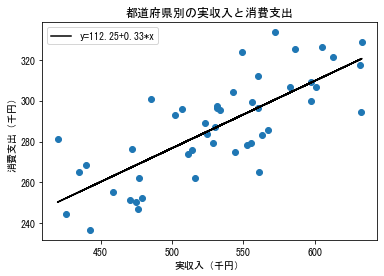

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,z,color='black',label='y={:.2f}+{:.2f}*x'.format(a,b))
ax.set_title('都道府県別の実収入と消費支出')
ax.set_xlabel('実収入（千円）')
ax.set_ylabel('消費支出（千円）')
ax.legend()

（マクロ的に）実収入が1円上がると消費支出が0.33円高くなる傾向にあることを示しています。

## 重回帰分析

説明変数が2つ以上ある回帰分析を「重回帰分析」といいます。ここでは、都道府県別の経済基盤指標のデータを用いて、一人あたり県民所得に影響する要因を探ります。まずデータを読み込みます。

In [5]:
df2=pd.read_excel('データ解析講座四日目演習.xlsx',sheet_name='経済基盤指標',index_col=0)
df2.head()

,県名,一人当たり県民所得,第二次産業事業所数構成比,第三次産業事業所数構成比,小規模事業所数割合,中規模事業所数割合,大規模事業所数割合,小規模事業所従業員割合,中規模事業所従業員割合,大規模事業所従業員割合,就業者一人当たり農業産出額,耕地面積比率,土地生産性,耕地面積
コード,,,,,,,,,,,,,,
1,北海道,2589,14.03,84.07,57.10,0.82,0.15,12.51,13.26,8.95,1254.7,14.6,105.7,257691.4
2,青森県,2462,14.73,84.06,59.90,0.69,0.09,14.27,12.34,5.43,497.5,15.7,211.5,33831.3
3,岩手県,2760,15.87,82.62,58.32,0.69,0.12,13.35,11.75,7.19,370.8,9.9,173.0,22768.9
4,宮城県,2987,15.94,83.41,54.34,0.84,0.19,11.50,12.67,10.31,339.3,17.5,143.4,24412.6
5,秋田県,2420,17.76,80.73,61.25,0.59,0.10,14.65,10.94,7.44,318.3,12.7,117.1,30215.3


ここでは、「一人当たり県民所得」を「第二次産業事業所数構成比」「大規模事業所数割合」「耕地面積比率」で説明する回帰分析を実施します。回帰分析をpythonで実施する方法はいくつかありますが、ここではstatsmodels.formula.apiを用います。回帰モデルの式は、'被説明変数~説明変数1+説明変数2+...+説明変数k'という形で文字列として与えます。変数名は日本語でもよいですが、ここでは全角の数字でエラーが出たため、あらかじめ漢数字に変えてあります。

In [6]:
import statsmodels.formula.api as smf
expr = '一人当たり県民所得 ~ 第二次産業事業所数構成比 + 大規模事業所数割合 + 耕地面積比率'
results = smf.ols(expr, data=df2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              一人当たり県民所得   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     38.74
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.74e-12
Time:                        23:56:07   Log-Likelihood:                -328.13
No. Observations:                  47   AIC:                             664.3
Df Residuals:                      43   BIC:                             671.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1303.0481    266.289      4.893      0.000     766.025    1840.072
第二次産業事業所数構成比    40.0421     13.249      3.022      0.004      13.323      66.761
大規模事業所数割合     5913.8876    587.254     10.070      0.000    4729.577    7098.198
耕地面積比率         -14.4503      7.530     -1.919      0.062     -29.636       0.735
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.727
Skew:                           0.287   Prob(JB):                        0.695
Kurtosis:                       2.797   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

上から二番目の表の'coef'欄の数字が回帰係数です。回帰係数は「他の説明変数が全て一定であるとして、その説明変数を1単位大きくしたら、被説明変数がどのくらい変化するか」を表したものです。ただし回帰係数は説明変数の分布のスケールに依存します。例えば上記の説明変数はいずれもパーセントですが、これを単なる比率（最大値1）で表したデータを用いると、回帰係数は100倍になります。つまり回帰係数の大きさでその説明変数の影響の度合いを評価することはできません。回帰係数の影響の大きさは、二番目の表の't'欄にあるt-統計量で評価します。t-統計量は回帰係数がゼロであるという帰無仮説に対する検定統計量で、't'欄の右隣の'P>|t|'欄の値は、回帰係数がゼロであるという帰無仮説のもとでt統計量の絶対値がその値より大きくなる確率を示します。通常の判定基準では、'P>|t|'欄の値が0.05以下であれば、回帰係数は有意にゼロから離れている、つまりその説明変数の影響は有意に大きい、ということが言えます。

上記の分析結果では、「第二次産業事業所数構成比」「大規模事業所数割合」ともに'P>|t|'欄の値が0.05以下なので、一人当たり県民所得に有意に影響しているといえます。「耕地面積比率」のP値は0.062で、ぎりぎりで有意とは言えない程度の影響の大きさになっています。また「耕地面積比率」の回帰係数は負なので、（「第二次産業事業所数構成比」「大規模事業所数割合」が同じだとして）耕地面積比率が大きい県ほど一人当たり県民所得は低い傾向があります。

## ロジスティック回帰分析

ロジスティック回帰分析は、被説明変数が二値データの場合の回帰分析です。まず、例題として用いるデータ（広告効果の分析）を読み込みます。データの出典は、https://www.kaggle.com/dragonheir/logistic-regression です。

In [7]:
df3 = pd.read_excel('データ解析講座四日目演習.xlsx',sheet_name='Social_Network_Ads',index_col=0)
df3.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


'Purchased'（購入した=1,購入しない=0）が被説明変数で、'Gender','Age','EstimatedSalary'を説明変数とします。Gender（性別）は二値のカテゴリカル変数なので、「女性」をベースとして男性のダミー変数を設けます。

In [8]:
df4 = pd.get_dummies(df3, drop_first=True, columns=['Gender'])
df4.head()

,Age,EstimatedSalary,Purchased,Gender_Male
User ID,,,,
15624510,19,19000,0,1
15810944,35,20000,0,1
15668575,26,43000,0,0
15603246,27,57000,0,0
15804002,19,76000,0,1


準備が整いましたのでロジスティック回帰分析を実施します。上の回帰分析と同様にstatsmodels.formula.apiを用います。基本的には'smf.ols'の部分を'smf.logit'に変えるだけです。

In [9]:
expr = 'Purchased ~ EstimatedSalary + Gender_Male + Age'
results2 = smf.logit(expr, data=df4).fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.4711
Time:                        23:56:08   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     -9.405      0.000     -15.448     -10.120
EstimatedSalary  3.644e-05   5.47e-06      6.659      0.000    2.57e-05    4.72e-05
Gender_Male         0.3338      0.305      1.094      0.274      -0.264       0.932
Age                 0.2370      0.026      8.984      0.000       0.185       0.289
===================================================================================
"""

'EstimatedSalary'（給与所得）が高いほど購買が有意に増えています。性別による差はあまりないようです。年齢が高くなるほど購買は有意に多くなっています。